In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\magnu\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: xlabel='job_title_short'>

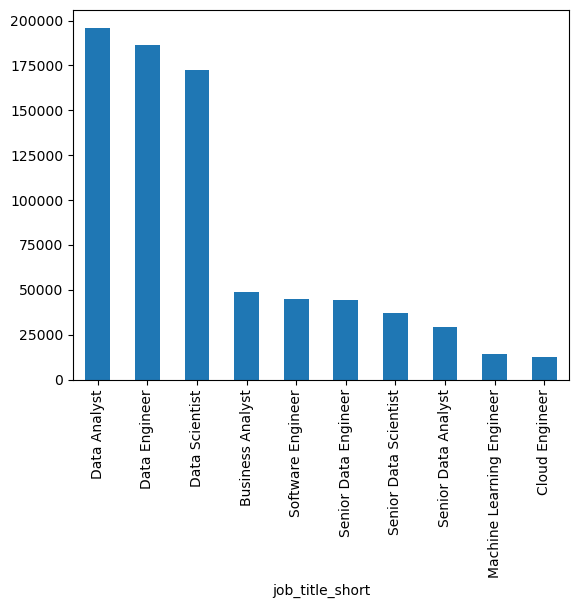

In [8]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

In [9]:
df['job_title_short'].value_counts().head(3)

job_title_short
Data Analyst      196075
Data Engineer     186241
Data Scientist    172286
Name: count, dtype: int64

In [10]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

<Axes: xlabel='job_schedule_type'>

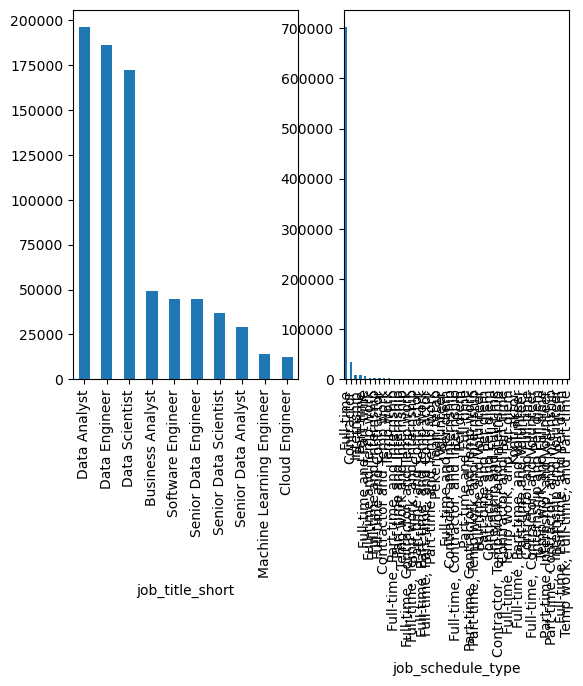

In [13]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().plot(kind='bar', ax=ax[1])

8187 3
3135 2
7896

In [15]:
# Create a copy of the dataframe to preserve the original
df_skills = df.copy()

# Explode the 'job_skills' list into individual rows for analysis
df_skills = df_skills.explode('job_skills')

# Group by 'job_skills' and 'job_title_short', and count occurrences
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Reset the index to convert the Series to a DataFrame and rename the count column
df_skills_count = skills_count.reset_index(name='skill_count')

# Sort by 'skill_count' in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

# Display the final DataFrame
print(df_skills_count)


      job_skills            job_title_short  skill_count
1480      python             Data Scientist       113711
1822         sql              Data Engineer       113130
1479      python              Data Engineer       108022
1821         sql               Data Analyst        92428
1823         sql             Data Scientist        78982
...          ...                        ...          ...
2173       webex      Senior Data Scientist            1
1054  mattermost             Data Scientist            1
270      clickup  Machine Learning Engineer            1
797       heroku        Senior Data Analyst            1
1128    msaccess               Data Analyst            1

[2256 rows x 3 columns]


In [16]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

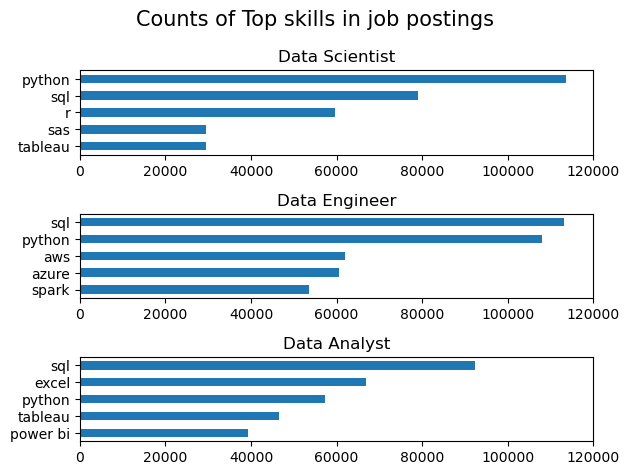

In [34]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = (df_skills_count[df_skills_count['job_title_short'] == job_title].head(5))
    df_plot.plot(kind='barh', x= 'job_skills', y= 'skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)  
    fig.suptitle('Counts of Top skills in job postings', fontsize=15)
    fig.tight_layout()